# Preprocess the data

In [1]:
import pandas as pd

combined_data = pd.read_csv('Coswara-Data/combined_data.csv')
combined_data.head()

,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,rU,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Keep only the columns that are needed for the analysis.

In [2]:
combined_data = combined_data[['id', 'covid_status', 'test_status']]
combined_data

,id,covid_status,test_status
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN
...,...,...,...
2472,333NjqA1TfZJuICEdXSkPhVz0LA3,positive_asymp,p
2473,dpA0EeRrtJUeKJjEuf7BL0AeTJZ2,positive_mild,p
2474,UXhG3vgoxkWtd4Meky1nm0sRgMV2,positive_mild,p
2475,A5KW9PXraNgckln1gnNaJnX6DvB2,positive_moderate,p


In [3]:
combined_data['covid_status'].value_counts()

healthy                        1410
positive_mild                   426
positive_moderate               164
no_resp_illness_exposed         161
recovered_full                  145
positive_asymp                   89
resp_illness_not_identified      82
Name: covid_status, dtype: int64

In [4]:
combined_data['test_status'].value_counts()

p     679
na    312
n     257
Name: test_status, dtype: int64

First let's rename 'healthy' to 'negative'.

In [5]:
combined_data.loc[combined_data['covid_status'] == 'healthy', 'covid_status'] = 'negative'

The 'ut' label for the `test_status` column seems to be used to indicate that the test was not validated yet, matching with the 'under_validation' label in the `covid_status` column.

In [6]:
combined_data[combined_data['test_status'] == 'ut']['covid_status'].value_counts()

Series([], Name: covid_status, dtype: int64)

Let's remove the rows with this label.

In [7]:
combined_data = combined_data[combined_data['test_status'] != 'ut']
combined_data['test_status'].value_counts()

p     679
na    312
n     257
Name: test_status, dtype: int64

In [8]:
combined_data[combined_data['test_status'] == 'na']['covid_status'].value_counts()

negative                       197
no_resp_illness_exposed         83
resp_illness_not_identified     32
Name: covid_status, dtype: int64

We can observe that the 'na' label for the `test_status` column, used to indicate that the test was not performed, matches in most cases with the 'negative' label in the `covid_status` column.  
Let's used this label as a 'n' label for the `test_status` column.

In [9]:
combined_data.loc[combined_data['test_status'] == 'na', 'test_status'] = 'n'
combined_data['test_status'].value_counts()

p    679
n    569
Name: test_status, dtype: int64

Now let's update the labels for the `covid_status` column to only have two labels: 'positive' and 'negative'.

In [10]:
combined_data['covid_status'].value_counts()

negative                       1410
positive_mild                   426
positive_moderate               164
no_resp_illness_exposed         161
recovered_full                  145
positive_asymp                   89
resp_illness_not_identified      82
Name: covid_status, dtype: int64

In [11]:
combined_data.loc[combined_data['test_status'] == 'n', 'covid_status'] = 'negative'
combined_data.loc[combined_data['test_status'] == 'p', 'covid_status'] = 'positive'
combined_data['covid_status'].value_counts()

negative             1683
positive              679
positive_mild          72
recovered_full         20
positive_asymp         14
positive_moderate       9
Name: covid_status, dtype: int64

We can observe that some labels in the `covid_status` column are still present. Let's check what can be done with them.

In [12]:
combined_data[(combined_data['covid_status'] != 'negative') & (combined_data['covid_status'] != 'positive')]['test_status'].notna().sum()

0

`test_status` column is set to NaN for all the rows with a different label in the `covid_status` column than 'positive' or 'negative'.  
Let's switch 'positive_mild', 'positive_asymp' and 'positive_moderate' labels to 'positive', and 'recovered_full' to 'negative'.

In [13]:
combined_data.loc[combined_data['covid_status'] == 'positive_mild', 'covid_status'] = 'positive'
combined_data.loc[combined_data['covid_status'] == 'positive_moderate', 'covid_status'] = 'positive'
combined_data.loc[combined_data['covid_status'] == 'positive_asymp', 'covid_status'] = 'positive'
combined_data.loc[combined_data['covid_status'] == 'recovered_full', 'covid_status'] = 'negative'
combined_data['covid_status'].value_counts()

negative    1703
positive     774
Name: covid_status, dtype: int64

For 'no_resp_illness_exposed' and 'resp_illness_not_identified', we can not deduced if the person is negative or not.  
Let's remove these rows.

In [14]:
combined_data = combined_data[(combined_data['covid_status'] == 'negative') | (combined_data['covid_status'] == 'positive')]
combined_data['covid_status'].value_counts()

negative    1703
positive     774
Name: covid_status, dtype: int64

In [15]:
combined_data['covid_status'].isna().sum()

0

We can observe that there is no NaN value in the `covid_status` column, we can now remove the `test_status` column.

In [16]:
combined_data = combined_data[combined_data.columns[~combined_data.columns.isin(['test_status'])]]
combined_data.head()

,id,covid_status
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,negative
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,negative
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,negative
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,negative
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,negative


In [17]:
len(combined_data)

2477

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(combined_data, test_size=0.2, random_state=42, stratify=combined_data['covid_status'])
train, val = train_test_split(train, test_size=0.2, random_state=42, stratify=train['covid_status'])

train['covid_status'].value_counts(), val['covid_status'].value_counts(), test['covid_status'].value_counts()

(negative    1089
 positive     495
 Name: covid_status, dtype: int64,
 negative    273
 positive    124
 Name: covid_status, dtype: int64,
 negative    341
 positive    155
 Name: covid_status, dtype: int64)

# Transform audio files to mel-spectrograms

In [19]:
import os

audio_folder = 'Coswara-Data/'

train_ids = train['id'].values
val_ids = val['id'].values
test_ids = test['id'].values

train_audio_folder = []
val_audio_folder = []
test_audio_folder = []

for folder1 in os.listdir(audio_folder):
    if os.path.isdir(os.path.join(audio_folder, folder1)):
        for folder2 in os.listdir(os.path.join(audio_folder, folder1)):
            if folder2 in train_ids:
                train_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
            elif folder2 in val_ids:
                val_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
            elif folder2 in test_ids:
                test_audio_folder.append(os.path.join(audio_folder, folder1, folder2))
            
assert len(train_audio_folder) == len(train_ids)
assert len(val_audio_folder) == len(val_ids)
assert len(test_audio_folder) == len(test_ids)

In [20]:
import librosa
import skimage
import numpy as np

# Settings
n_mels = 64 # Number of Mel banks to generate
n_fft = 1024 # Interval we consider to apply FFT. Measured in # of samples
hop_length = 441 # Sliding window for FFT. Measured in # of samples
fmax = 22 # Maximum frequency we want to consider
sampling_rate = 44100 # 44.1kHz sampling rate
fmax = 22050

/home/leme/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [21]:
import torch
import torchaudio

def compute_SAD(sig,fs,threshold=0.0001,sad_start_end_sil_length=100, sad_margin_length=50):
    ''' Compute threshold based sound activity '''
    # Leading/Trailing margin
    sad_start_end_sil_length = int(sad_start_end_sil_length*1e-3*fs)
    # Margin around active samples
    sad_margin_length = int(sad_margin_length*1e-3*fs)

    sample_activity = np.zeros(sig.shape)
    sample_activity[np.power(sig,2)>threshold] = 1
    sad = np.zeros(sig.shape)
    for i in range(sample_activity.shape[0]):
        if sample_activity[i] == 1: sad[i-sad_margin_length:i+sad_margin_length] = 1
    sad[0:sad_start_end_sil_length] = 0
    sad[-sad_start_end_sil_length:] = 0
    return sad

def read_audio(file_path):
	try:
		s,fs = librosa.load(file_path)
		if np.mean(s)==0 or len(s)<1024:
			raise ValueError()
		# waveform level amplitude normalization
		s = s/np.max(np.abs(s))
		sad = compute_SAD(s,fs)
		s = s[np.where(sad==1)]
	except ValueError:
		s = None
		print("Read audio failed for "+file_path)		
	return s

def compute_logMelSpec(s):
	''' Feature preparation
	Steps:
	1. Apply feature extraction to waveform
	2. Convert amplitude to dB if required
	3. Append delta and delta-delta features
	'''
	F_extractor = torchaudio.transforms.MelSpectrogram(sample_rate=sampling_rate,
                                                                            n_fft=n_fft,
                                                                            n_mels=n_mels,
                                                                            f_max=fmax,
                                                                            hop_length=hop_length)
	F = F_extractor(torch.tensor(s))
	F = torchaudio.functional.amplitude_to_DB(F,multiplier=10,amin=1e-10,db_multiplier=0)
	Fo=F
	FD = torchaudio.functional.compute_deltas(F)
	Fo = torch.cat((F,FD),dim=0)
	FD = torchaudio.functional.compute_deltas(F)
	FDD = torchaudio.functional.compute_deltas(FD)
	Fo = torch.cat((F,FD,FDD),dim=0)
	return (Fo.T.numpy())


/home/leme/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
def get_features(audio_folder, audio_name):
    audio = read_audio(os.path.join(audio_folder, audio_name))
    features = compute_logMelSpec(audio)
    return features

In [23]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def extract_melspectrogram(audio_folder, audio_name):
    audio, sr = librosa.load(os.path.join(audio_folder, audio_name))
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, fmax=fmax)
    melspectrogram = np.log(melspectrogram + 1e-9) # add small number to avoid log(0)
    return melspectrogram

def extract_melspectrogram_image(audio_folder, audio_name):
    melspectrogram = extract_melspectrogram(audio_folder, audio_name)
    img = scale_minmax(melspectrogram, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0)
    img = 255 - img
    skimage.io.imsave(os.path.join(audio_folder, audio_name + '.png'), img, check_contrast=False)
    return melspectrogram

In [24]:
from tqdm import tqdm

audio_names = ['cough-heavy.wav', 'cough-shallow.wav']

def get_data(df, audio_folder, audio_names):
    data = []
    for folder in tqdm(audio_folder):
        for audio_name in audio_names:
            try:
                #d = extract_melspectrogram_image(folder, audio_name) # uncomment this line to save melspectrogram image
                #d = extract_melspectrogram(folder, audio_name) # uncomment this line to save melspectrogram
                d = get_features(folder, audio_name) # uncomment this line to save melspectrogram features
                label = df[df['id'] == folder.split('/')[-1]]['covid_status'].values[0]
                data.append((d, label))
            except:
                continue
    data = np.array(data)
    return data

print('Extracting melspectrogram for test set...')
test_data = get_data(test, test_audio_folder, audio_names)
np.save('test_data.npy', test_data)

print('Extracting melspectrogram for train set...')
train_data = get_data(train, train_audio_folder, audio_names)
np.save('train_data.npy', train_data)

print('Extracting melspectrogram for validation set...')
val_data = get_data(val, val_audio_folder, audio_names)
np.save('val_data.npy', val_data)

Extracting melspectrogram for test set...


  2%|▏         | 12/496 [00:06<03:39,  2.20it/s]

Read audio failed for Coswara-Data/20200413/U98J2q0NnycYzzUS2BYZpUa55X83/cough-heavy.wav


  3%|▎         | 13/496 [00:06<03:44,  2.15it/s]

Read audio failed for Coswara-Data/20200413/U98J2q0NnycYzzUS2BYZpUa55X83/cough-shallow.wav
Read audio failed for Coswara-Data/20200413/zvXkuEaPb0OEgG4EHx59NqdmamR2/cough-heavy.wav


  3%|▎         | 14/496 [00:07<04:12,  1.91it/s]

Read audio failed for Coswara-Data/20200413/zvXkuEaPb0OEgG4EHx59NqdmamR2/cough-shallow.wav


  6%|▌         | 30/496 [00:15<03:14,  2.39it/s]

Read audio failed for Coswara-Data/20200415/QlMu7Fl8iIgOZM3QHEOzOJY6npH3/cough-heavy.wav
Read audio failed for Coswara-Data/20200415/QlMu7Fl8iIgOZM3QHEOzOJY6npH3/cough-shallow.wav


  6%|▋         | 32/496 [00:15<03:19,  2.33it/s]

Read audio failed for Coswara-Data/20200415/StMoprM57wPyrUs5p0s78r1X0Qt1/cough-shallow.wav


  9%|▊         | 43/496 [00:21<03:49,  1.97it/s]/home/leme/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)
 41%|████▏     | 205/496 [01:44<02:17,  2.12it/s]

Read audio failed for Coswara-Data/20200820/aU8pLZV1OUQJV0GKeeIlgWhYWeA2/cough-shallow.wav


 52%|█████▏    | 260/496 [02:10<01:28,  2.67it/s]

Read audio failed for Coswara-Data/20210406/c18b81Qa5YY2RbEzblDNxMNQE312/cough-heavy.wav


 73%|███████▎  | 362/496 [03:07<00:50,  2.64it/s]

Read audio failed for Coswara-Data/20210830/893CVd6PDMVocg2NUuxlMR2MLtr1/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/893CVd6PDMVocg2NUuxlMR2MLtr1/cough-shallow.wav


 73%|███████▎  | 363/496 [03:07<00:41,  3.17it/s]

Read audio failed for Coswara-Data/20210830/bg0A9VSw8yUI2XHBYnyjRTF6Yk83/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/bg0A9VSw8yUI2XHBYnyjRTF6Yk83/cough-shallow.wav
Read audio failed for Coswara-Data/20210830/C1gtLXT26vXGmSoubzZKPtzsU1M2/cough-heavy.wav


 73%|███████▎  | 364/496 [03:07<00:44,  2.95it/s]

Read audio failed for Coswara-Data/20210830/C1gtLXT26vXGmSoubzZKPtzsU1M2/cough-shallow.wav


 74%|███████▍  | 367/496 [03:08<00:39,  3.23it/s]

Read audio failed for Coswara-Data/20210830/mdnBfPM4iLX7S1O9v92lao51Agz1/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/mdnBfPM4iLX7S1O9v92lao51Agz1/cough-shallow.wav


 74%|███████▍  | 369/496 [03:09<00:38,  3.33it/s]

Read audio failed for Coswara-Data/20210830/OC99RqHzOjNvaA0rJhPUgP4PM2o1/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/OC99RqHzOjNvaA0rJhPUgP4PM2o1/cough-shallow.wav


 75%|███████▌  | 374/496 [03:11<00:43,  2.79it/s]

Read audio failed for Coswara-Data/20210830/z11Uz5A6KqNGTti7xPmty0H8mLW2/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/z11Uz5A6KqNGTti7xPmty0H8mLW2/cough-shallow.wav


 76%|███████▋  | 379/496 [03:13<00:41,  2.80it/s]

Read audio failed for Coswara-Data/20210914/lMENbuoFgAdokwyJxN0RiDDuiu03/cough-heavy.wav
Read audio failed for Coswara-Data/20210914/lMENbuoFgAdokwyJxN0RiDDuiu03/cough-shallow.wav


 86%|████████▌ | 427/496 [03:31<00:18,  3.81it/s]

Read audio failed for Coswara-Data/20220116/npdYHgmoGnN0QslTqGQd2i28LMo1/cough-heavy.wav
Read audio failed for Coswara-Data/20220116/npdYHgmoGnN0QslTqGQd2i28LMo1/cough-shallow.wav


 99%|█████████▉| 492/496 [03:58<00:01,  2.62it/s]

Read audio failed for Coswara-Data/20220224/zl0ycIoAzhSJU1xsyLSNCDQA9Rr2/cough-heavy.wav
Read audio failed for Coswara-Data/20220224/zl0ycIoAzhSJU1xsyLSNCDQA9Rr2/cough-shallow.wav


100%|██████████| 496/496 [04:00<00:00,  2.06it/s]
/tmp/ipykernel_1272/3512539183.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


Extracting melspectrogram for train set...


  0%|          | 3/1584 [00:01<11:32,  2.28it/s]

Read audio failed for Coswara-Data/20200413/2XgDqzQkqLX9SbmSHfbqdRxSmRD2/cough-heavy.wav
Read audio failed for Coswara-Data/20200413/2XgDqzQkqLX9SbmSHfbqdRxSmRD2/cough-shallow.wav


  1%|          | 19/1584 [00:10<11:59,  2.18it/s]

Read audio failed for Coswara-Data/20200413/htQzROl26OWQpIYFDzv11F79PLR2/cough-heavy.wav
Read audio failed for Coswara-Data/20200413/htQzROl26OWQpIYFDzv11F79PLR2/cough-shallow.wav


  2%|▏         | 32/1584 [00:16<11:54,  2.17it/s]

Read audio failed for Coswara-Data/20200413/tiKv850hJFTmpCAvfJOmOOqkeUs1/cough-heavy.wav
Read audio failed for Coswara-Data/20200413/tiKv850hJFTmpCAvfJOmOOqkeUs1/cough-shallow.wav


  5%|▍         | 79/1584 [00:37<08:31,  2.94it/s]

Read audio failed for Coswara-Data/20200415/f9g4olEAspen4dJakQJsI2EME032/cough-heavy.wav
Read audio failed for Coswara-Data/20200415/f9g4olEAspen4dJakQJsI2EME032/cough-shallow.wav


  6%|▋         | 99/1584 [00:48<09:36,  2.57it/s]

Read audio failed for Coswara-Data/20200415/jSb7SyucSmTHhzs3qQoBExRMQZ02/cough-shallow.wav


  8%|▊         | 122/1584 [01:00<12:58,  1.88it/s]

Read audio failed for Coswara-Data/20200415/V3EIT06H4JN5KwoK8aGRXQNzGRi1/cough-heavy.wav


 12%|█▏        | 188/1584 [01:34<11:14,  2.07it/s]

Read audio failed for Coswara-Data/20200416/HdJdEWQecehLzEQcyDV7vjr85C82/cough-heavy.wav
Read audio failed for Coswara-Data/20200416/HdJdEWQecehLzEQcyDV7vjr85C82/cough-shallow.wav


 18%|█▊        | 290/1584 [02:24<10:18,  2.09it/s]

Read audio failed for Coswara-Data/20200417/imhxF3UQDZNVEnNeyw8jOAsgtjv2/cough-heavy.wav
Read audio failed for Coswara-Data/20200417/imhxF3UQDZNVEnNeyw8jOAsgtjv2/cough-shallow.wav


 26%|██▌       | 406/1584 [03:21<06:29,  3.02it/s]

Read audio failed for Coswara-Data/20200430/C3luMlCgAFZqGmGjFscXe9fVHSG3/cough-heavy.wav


 34%|███▍      | 542/1584 [04:30<08:40,  2.00it/s]

Read audio failed for Coswara-Data/20200504/qkdJKHOBuAYsKvnxbLvnoJ5Dc8y2/cough-heavy.wav


 34%|███▍      | 543/1584 [04:31<08:01,  2.16it/s]

Read audio failed for Coswara-Data/20200504/qkdJKHOBuAYsKvnxbLvnoJ5Dc8y2/cough-shallow.wav


 35%|███▌      | 557/1584 [04:37<07:28,  2.29it/s]

Read audio failed for Coswara-Data/20200505/0M4YhLM7FwWO5IjCqhi7MlBhvJv2/cough-heavy.wav
Read audio failed for Coswara-Data/20200505/0M4YhLM7FwWO5IjCqhi7MlBhvJv2/cough-shallow.wav


 35%|███▌      | 558/1584 [04:37<06:29,  2.63it/s]

Read audio failed for Coswara-Data/20200505/GBZ88OAxQfg6NBTxjDRI0Pf59mq1/cough-shallow.wav


 39%|███▊      | 610/1584 [04:59<07:28,  2.17it/s]

Read audio failed for Coswara-Data/20200707/fYjYHeLgCOUf5m1f8EAgGDol5G73/cough-shallow.wav


 44%|████▍     | 701/1584 [05:42<07:01,  2.09it/s]

Read audio failed for Coswara-Data/20200820/fuCq7eA5CPYcnRpJqc0hFSr8klr2/cough-heavy.wav
Read audio failed for Coswara-Data/20200820/fuCq7eA5CPYcnRpJqc0hFSr8klr2/cough-shallow.wav


 45%|████▌     | 715/1584 [05:47<05:26,  2.66it/s]

Read audio failed for Coswara-Data/20200820/yZuoG6z3pRfycT6JKqwqKDMj4tM2/cough-heavy.wav
Read audio failed for Coswara-Data/20200820/yZuoG6z3pRfycT6JKqwqKDMj4tM2/cough-shallow.wav


 47%|████▋     | 738/1584 [05:56<06:00,  2.35it/s]

Read audio failed for Coswara-Data/20200911/CdU4pgCdFcZxtDHTpLUn1mO9J3o2/cough-shallow.wav


 52%|█████▏    | 819/1584 [06:27<04:53,  2.61it/s]

Read audio failed for Coswara-Data/20201130/IWZidWG1Y3aIbwBNfyR5P9rt0O82/cough-heavy.wav
Read audio failed for Coswara-Data/20201130/IWZidWG1Y3aIbwBNfyR5P9rt0O82/cough-shallow.wav


 54%|█████▎    | 849/1584 [06:40<04:49,  2.54it/s]

Read audio failed for Coswara-Data/20210406/0mkAUAbpROMIFjKpdFxlUnYTV262/cough-heavy.wav
Read audio failed for Coswara-Data/20210406/0mkAUAbpROMIFjKpdFxlUnYTV262/cough-shallow.wav


 55%|█████▌    | 874/1584 [06:50<03:49,  3.09it/s]

Read audio failed for Coswara-Data/20210406/NcPBzMBBxNbjK84kdCv2z4IJzLC3/cough-heavy.wav
Read audio failed for Coswara-Data/20210406/NcPBzMBBxNbjK84kdCv2z4IJzLC3/cough-shallow.wav


 71%|███████▏  | 1129/1584 [08:48<02:29,  3.05it/s]

Read audio failed for Coswara-Data/20210816/0dfJArS4xbNhay72hpzOvlHkpIj2/cough-heavy.wav
Read audio failed for Coswara-Data/20210816/0dfJArS4xbNhay72hpzOvlHkpIj2/cough-shallow.wav


 72%|███████▏  | 1138/1584 [08:51<02:05,  3.55it/s]

Read audio failed for Coswara-Data/20210816/5VMtlrkOQbXGDLgpTBy3RVoVz1I3/cough-heavy.wav
Read audio failed for Coswara-Data/20210816/5VMtlrkOQbXGDLgpTBy3RVoVz1I3/cough-shallow.wav


 74%|███████▍  | 1174/1584 [09:03<01:56,  3.51it/s]

Read audio failed for Coswara-Data/20210816/WcRpZenx0WWQmzOUPTHEEGlyJAg1/cough-heavy.wav
Read audio failed for Coswara-Data/20210816/WcRpZenx0WWQmzOUPTHEEGlyJAg1/cough-shallow.wav


 75%|███████▍  | 1187/1584 [09:08<02:17,  2.89it/s]

Read audio failed for Coswara-Data/20210830/4O0K7hT7XgOD4hysPGeuTXfDjF03/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/4O0K7hT7XgOD4hysPGeuTXfDjF03/cough-shallow.wav


 75%|███████▌  | 1194/1584 [09:10<01:40,  3.89it/s]

Read audio failed for Coswara-Data/20210830/drfMOiYPMLOOOLejs4s2rW8HQau2/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/drfMOiYPMLOOOLejs4s2rW8HQau2/cough-shallow.wav
Read audio failed for Coswara-Data/20210830/Ea7U78zNVGNlzPCXKviy1ApAcfo2/cough-heavy.wav


 75%|███████▌  | 1195/1584 [09:11<02:03,  3.16it/s]

Read audio failed for Coswara-Data/20210830/Ea7U78zNVGNlzPCXKviy1ApAcfo2/cough-shallow.wav


 76%|███████▌  | 1200/1584 [09:13<02:55,  2.18it/s]

Read audio failed for Coswara-Data/20210830/ijTkM1TDeeXxjotuSx0D7Bhk2H72/cough-heavy.wav


 76%|███████▌  | 1201/1584 [09:13<02:50,  2.24it/s]

Read audio failed for Coswara-Data/20210830/ijTkM1TDeeXxjotuSx0D7Bhk2H72/cough-shallow.wav


 76%|███████▋  | 1209/1584 [09:17<02:00,  3.12it/s]

Read audio failed for Coswara-Data/20210830/r7mpJTuaZYNE7L4ohPsXiqLbba93/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/r7mpJTuaZYNE7L4ohPsXiqLbba93/cough-shallow.wav


 77%|███████▋  | 1212/1584 [09:18<01:55,  3.21it/s]

Read audio failed for Coswara-Data/20210830/VlQvT9LEVHMLQq3GSPkH4vyskW83/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/VlQvT9LEVHMLQq3GSPkH4vyskW83/cough-shallow.wav


 77%|███████▋  | 1221/1584 [09:21<01:58,  3.08it/s]

Read audio failed for Coswara-Data/20210914/BJ07uOrLOCbKZGwhOCajxBj8Y8g1/cough-heavy.wav
Read audio failed for Coswara-Data/20210914/BJ07uOrLOCbKZGwhOCajxBj8Y8g1/cough-shallow.wav


 78%|███████▊  | 1232/1584 [09:26<02:31,  2.32it/s]

Read audio failed for Coswara-Data/20210914/saLiV2oREChEpRlmo4TikTNRuZV2/cough-heavy.wav
Read audio failed for Coswara-Data/20210914/saLiV2oREChEpRlmo4TikTNRuZV2/cough-shallow.wav


 78%|███████▊  | 1233/1584 [09:26<02:12,  2.65it/s]

Read audio failed for Coswara-Data/20210914/SBmgSU1SafhWfw4b8d4o07Iwzqw1/cough-heavy.wav
Read audio failed for Coswara-Data/20210914/SBmgSU1SafhWfw4b8d4o07Iwzqw1/cough-shallow.wav


 78%|███████▊  | 1243/1584 [09:30<02:03,  2.75it/s]

Read audio failed for Coswara-Data/20210930/0Js6ZUZQ9NUnu568Fh7B6mZ1R8o1/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/0Js6ZUZQ9NUnu568Fh7B6mZ1R8o1/cough-shallow.wav


 79%|███████▊  | 1245/1584 [09:31<01:32,  3.65it/s]

Read audio failed for Coswara-Data/20210930/1NQvmLMrJyTwrmbNwAm6wDT4wpz2/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/1NQvmLMrJyTwrmbNwAm6wDT4wpz2/cough-shallow.wav


 79%|███████▉  | 1254/1584 [09:34<01:33,  3.51it/s]

Read audio failed for Coswara-Data/20210930/A58WTjeBHaSeuC3PPfLPo3RiEgt2/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/A58WTjeBHaSeuC3PPfLPo3RiEgt2/cough-shallow.wav


 80%|███████▉  | 1261/1584 [09:36<01:35,  3.37it/s]

Read audio failed for Coswara-Data/20210930/eR2gfqeYAjdgzpwtCDXUqts9yIc2/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/eR2gfqeYAjdgzpwtCDXUqts9yIc2/cough-shallow.wav


 80%|███████▉  | 1267/1584 [09:38<01:41,  3.12it/s]

Read audio failed for Coswara-Data/20210930/GKupow0m24SgP8whGGJBZrPbS9k2/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/GKupow0m24SgP8whGGJBZrPbS9k2/cough-shallow.wav


 82%|████████▏ | 1297/1584 [09:48<01:30,  3.18it/s]

Read audio failed for Coswara-Data/20210930/UKrkCs1fdsVnZ7EfqWJCRxvIyZ22/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/UKrkCs1fdsVnZ7EfqWJCRxvIyZ22/cough-shallow.wav


 82%|████████▏ | 1299/1584 [09:49<01:32,  3.09it/s]

Read audio failed for Coswara-Data/20210930/wFhImPjbZkWVRY7xDoz2PmS5X8R2/cough-heavy.wav


 82%|████████▏ | 1300/1584 [09:49<01:37,  2.90it/s]

Read audio failed for Coswara-Data/20210930/wFhImPjbZkWVRY7xDoz2PmS5X8R2/cough-shallow.wav


 82%|████████▏ | 1302/1584 [09:50<01:29,  3.15it/s]

Read audio failed for Coswara-Data/20210930/wRIACcPu2dS0xiHj6O7O4eJXKT53/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/wRIACcPu2dS0xiHj6O7O4eJXKT53/cough-shallow.wav


 83%|████████▎ | 1308/1584 [09:52<01:26,  3.18it/s]

Read audio failed for Coswara-Data/20210930/YE3Hs5yD9BeIzT8cctZEBKGJIXN2/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/YE3Hs5yD9BeIzT8cctZEBKGJIXN2/cough-shallow.wav


 84%|████████▍ | 1338/1584 [10:05<01:54,  2.15it/s]

Read audio failed for Coswara-Data/20220116/DzSbdHq5VTZB8CaVDWSnSUai5mt2/cough-heavy.wav
Read audio failed for Coswara-Data/20220116/DzSbdHq5VTZB8CaVDWSnSUai5mt2/cough-shallow.wav


 98%|█████████▊| 1560/1584 [11:36<00:08,  2.88it/s]

Read audio failed for Coswara-Data/20220224/Wmyru2tTpETZZUPASSqg7gJjev02/cough-heavy.wav
Read audio failed for Coswara-Data/20220224/Wmyru2tTpETZZUPASSqg7gJjev02/cough-shallow.wav


100%|█████████▉| 1579/1584 [11:44<00:02,  2.37it/s]

Read audio failed for Coswara-Data/20220224/YRn1xdEIHufqa6lRl35Lg1YUXoJ3/cough-heavy.wav
Read audio failed for Coswara-Data/20220224/YRn1xdEIHufqa6lRl35Lg1YUXoJ3/cough-shallow.wav


100%|██████████| 1584/1584 [11:46<00:00,  2.24it/s]


Extracting melspectrogram for validation set...


  2%|▏         | 9/397 [00:05<03:43,  1.73it/s]

Read audio failed for Coswara-Data/20200413/UiUUhL0PMjWVA6W2dKte1DCE6wG2/cough-heavy.wav
Read audio failed for Coswara-Data/20200413/UiUUhL0PMjWVA6W2dKte1DCE6wG2/cough-shallow.wav


 52%|█████▏    | 205/397 [01:34<01:09,  2.77it/s]

Read audio failed for Coswara-Data/20201221/9z2XQAVyIkb0saZVigWBr3MsDcr1/cough-shallow.wav


 72%|███████▏  | 287/397 [02:10<00:33,  3.27it/s]

Read audio failed for Coswara-Data/20210714/dpA0EeRrtJUeKJjEuf7BL0AeTJZ2/cough-shallow.wav


 73%|███████▎  | 290/397 [02:12<00:48,  2.23it/s]

Read audio failed for Coswara-Data/20210714/J2KBR20S1lOfFS2iA7UyuOBOmgq1/cough-heavy.wav
Read audio failed for Coswara-Data/20210714/J2KBR20S1lOfFS2iA7UyuOBOmgq1/cough-shallow.wav


 75%|███████▌  | 299/397 [02:15<00:31,  3.09it/s]

Read audio failed for Coswara-Data/20210816/JCUp9v6I7uNudJfxbx2MVKIJsn42/cough-heavy.wav
Read audio failed for Coswara-Data/20210816/JCUp9v6I7uNudJfxbx2MVKIJsn42/cough-shallow.wav


 78%|███████▊  | 308/397 [02:18<00:37,  2.39it/s]

Read audio failed for Coswara-Data/20210830/8FB1tjOY8mbxWnL3QfuB1bywCA83/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/8FB1tjOY8mbxWnL3QfuB1bywCA83/cough-shallow.wav


 78%|███████▊  | 309/397 [02:19<00:36,  2.41it/s]

Read audio failed for Coswara-Data/20210830/DKKyIfK2wWVheujgbhkDKzpEHJE3/cough-heavy.wav


 78%|███████▊  | 311/397 [02:19<00:28,  3.05it/s]

Read audio failed for Coswara-Data/20210830/DKKyIfK2wWVheujgbhkDKzpEHJE3/cough-shallow.wav
Read audio failed for Coswara-Data/20210830/EcZEa8IomxYk9MmRANz215imk8N2/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/EcZEa8IomxYk9MmRANz215imk8N2/cough-shallow.wav


 80%|███████▉  | 316/397 [02:21<00:21,  3.73it/s]

Read audio failed for Coswara-Data/20210830/plyCfBNtOnbjBXIVa996Dq1EJ5u2/cough-heavy.wav
Read audio failed for Coswara-Data/20210830/plyCfBNtOnbjBXIVa996Dq1EJ5u2/cough-shallow.wav


 83%|████████▎ | 328/397 [02:26<00:23,  2.90it/s]

Read audio failed for Coswara-Data/20210930/fxKtohOugAVxds721TRXR8GVmn02/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/fxKtohOugAVxds721TRXR8GVmn02/cough-shallow.wav


 84%|████████▍ | 334/397 [02:27<00:17,  3.53it/s]

Read audio failed for Coswara-Data/20210930/yTldbEFYIkOvoaY6f0elulpdzxQ2/cough-heavy.wav
Read audio failed for Coswara-Data/20210930/yTldbEFYIkOvoaY6f0elulpdzxQ2/cough-shallow.wav


 88%|████████▊ | 350/397 [02:35<00:23,  2.03it/s]

Read audio failed for Coswara-Data/20220116/y3qWUVLhMeQvpdfsClkugyMnBmH3/cough-heavy.wav
Read audio failed for Coswara-Data/20220116/y3qWUVLhMeQvpdfsClkugyMnBmH3/cough-shallow.wav


100%|██████████| 397/397 [02:53<00:00,  2.29it/s]


# Create CNN model for classification

In [80]:
import numpy as np

train_data = np.load('train_data.npy', allow_pickle=True)
val_data = np.load('val_data.npy', allow_pickle=True)
test_data = np.load('test_data.npy', allow_pickle=True)

In [81]:
import tensorflow as tf

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(8, 3, activation='relu', input_shape=(128, 128, 1), padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 64, 64, 8)        32        
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                     

### Get the labels

In [82]:
train_labels = np.array([label for _, label in train_data])
val_labels = np.array([label for _, label in val_data])
test_labels = np.array([label for _, label in test_data])

### Get and resize the mel-spectrograms

In [83]:
import skimage

def resize_melspectrogram(melspectrogram):
    return skimage.transform.resize(melspectrogram, (128, 128))

train_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in train_data])
val_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in val_data])
test_melspectrogram = np.array([resize_melspectrogram(melspectrogram) for melspectrogram, _ in test_data])

### Binarize the labels

In [84]:
train_labels = (train_labels == 'positive').astype(int)
val_labels = (val_labels == 'positive').astype(int)
test_labels = (test_labels == 'positive').astype(int)

### Train the model

In [85]:
epochs = 10
batch_size = 32
history = model.fit(train_melspectrogram, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(val_melspectrogram, val_labels))

Epoch 1/10
97/97 [==============================] - 9s 88ms/step - loss: 0.7159 - accuracy: 0.6704 - val_loss: 0.5818 - val_accuracy: 0.6917
Epoch 2/10
97/97 [==============================] - 8s 80ms/step - loss: 0.5409 - accuracy: 0.7122 - val_loss: 0.5770 - val_accuracy: 0.7254
Epoch 3/10
97/97 [==============================] - 8s 83ms/step - loss: 0.5123 - accuracy: 0.7333 - val_loss: 0.6188 - val_accuracy: 0.6438
Epoch 4/10
97/97 [==============================] - 8s 80ms/step - loss: 0.4435 - accuracy: 0.7797 - val_loss: 0.5825 - val_accuracy: 0.6917
Epoch 5/10
97/97 [==============================] - 8s 84ms/step - loss: 0.3607 - accuracy: 0.8247 - val_loss: 0.6161 - val_accuracy: 0.7111
Epoch 6/10
97/97 [==============================] - 8s 87ms/step - loss: 0.2612 - accuracy: 0.8892 - val_loss: 0.7093 - val_accuracy: 0.7124
Epoch 7/10
97/97 [==============================] - 9s 90ms/step - loss: 0.1813 - accuracy: 0.9268 - val_loss: 0.9439 - val_accuracy: 0.7241
Epoch 8/10
97

### Plot the training and validation accuracy/loss per epoch

Text(0.5, 1.0, 'Training and Validation Loss')

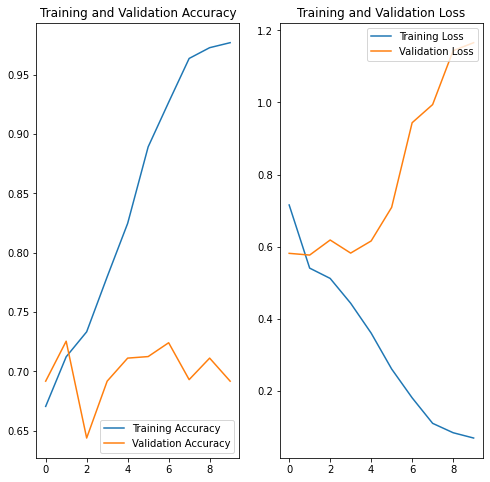

In [86]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

### Evaluate the model

In [87]:
model.evaluate(test_melspectrogram, test_labels)

31/31 [==============================] - 0s 15ms/step - loss: 1.0922 - accuracy: 0.6867


[1.0922260284423828, 0.6867219805717468]

### Get confusion matrix

<AxesSubplot:>

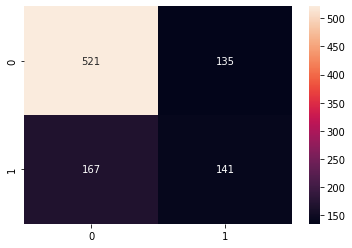

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(test_melspectrogram)

cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
sns.heatmap(cm, annot=True, fmt='d')

### Save the model

In [ ]:
model.save('covid_cough_classifier.h5')